In [1]:
import numpy as np
import jax.numpy as jnp
import time
import pandas as pd

from numerical_methods.nonlinear_system import fixed_point, newton

In [2]:
def g1(x1, x2):
    return (x1**2 + x2**2 + 8) / 10

def g2(x1, x2):
    return (x1*x2**2 + x1 + 8) / 10


def f1(x1, x2):
    return 4 * x1**2 - 20 * x1 + x2**2 / 4 + 8


def f2(x1, x2):
    return x1 * x2**2 / 2 + 2 * x1 - 5 * x2 + 8


G = [g1, g2]
F = np.array([f1, f2])
x0 = np.zeros(shape=(2,))

In [3]:
def count_iter(xs):
    count = 0
    xs = np.array(xs)
    for i in range(1, len(xs)):
        if np.linalg.norm(xs[i] - xs[i-1]) != 0:
            count += 1
    return count

In [4]:
fixed_point_start = time.time()
fp_sol = fixed_point(None, x0, tol=10e-6, gs=G)
fp_time = time.time() - fixed_point_start
fp_iter = count_iter(fp_sol)
fp_iter

13

In [5]:
newton(F, np.zeros(shape=(2,)), tol=10e-6)
newton_start = time.time()
newton_sol = newton(F, x0, tol=10e-6)
newton_time = time.time() - newton_start
newton_iter = count_iter(newton_sol)
newton_iter

4

In [6]:
df = pd.DataFrame({
    "Fixed Point": [fp_time, fp_iter],
    "Newton": [newton_time, newton_iter],
}).T
df = df.set_axis(["Execution Time", "#Iteration"], axis=1)
df

,Execution Time,#Iteration
Fixed Point,0.063395,13.0
Newton,0.040670,4.0


In [7]:
print(df.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Execution Time &  \#Iteration \\
\midrule
Fixed Point &        0.063395 &        13.0 \\
Newton      &        0.040670 &         4.0 \\
\bottomrule
\end{tabular}



/var/folders/tc/kg28gjm16xgc5t5lyfvh_5sw0000gn/T/ipykernel_69285/2350534188.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


In [8]:
err_df = pd.DataFrame({
    "Fixed Point": [np.linalg.norm(xs - np.array([1.0, 1.0])) for xs in fp_sol],
    "Newton": [np.linalg.norm(xs - np.array([0.5, 2.0])) for xs in newton_sol],
})
err_df

,Fixed Point,Newton
0,1.414214,2.061553
1,0.282843,0.260000
2,0.099586,0.017077
3,0.038113,0.000064
4,0.014990,0.000000
5,0.005957,0.000000
6,0.002376,0.000000
7,0.000950,0.000000
8,0.000380,0.000000
9,0.000152,0.000000


<AxesSubplot:title={'center':'error verse iteration number for each method'}, xlabel='iteration', ylabel='error'>

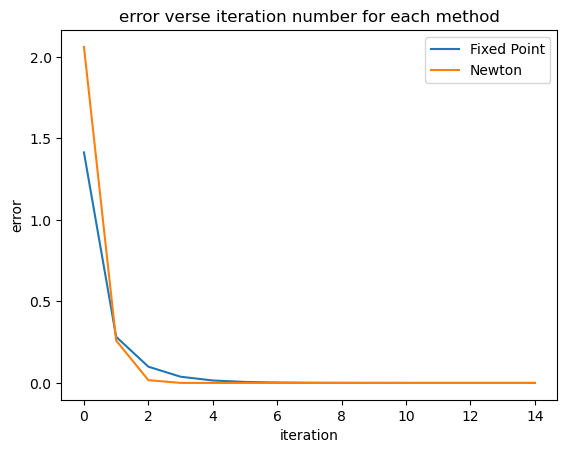

In [9]:
err_df.plot(
    title="error verse iteration number for each method",
    legend=True,
    xlabel="iteration",
    ylabel="error",
)